# **Policy-Based Methods**
### Hill Climbing algorithm

Import necessary packages

In [29]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

###Tunning the image rendering in colab


In [30]:

!apt-get install -y xvfb x11-utils

!pip install pyvirtualdisplay==0.2.* \
             PyOpenGL==3.1.* \
             PyOpenGL-accelerate==3.1.*

!pip install gym[box2d]==0.17.*


!sudo apt-get update
!sudo apt-get install xvfb --fix-missing

import pyvirtualdisplay

_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
_ = _display.start()

!echo $DISPLAY 

from IPython import display

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/mac

OpenAI Gym's Cartpole Environment

In [31]:
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)
print('threshold: ', env.spec.reward_threshold)


observation space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
action space: Discrete(2)
threshold:  195.0



Define  policy π (and initialize with random weights θ)

In [32]:
class Policy():
    def __init__(self, s_size=4, a_size=2):
    
        self.θ = 1e-4*np.random.rand(s_size, a_size)  
        
    def forward(self, state):
        x = np.dot(state, self.θ)
        return np.exp(x)/sum(np.exp(x))
    
    def act(self, state):
        probs = self.forward(state)
        action = np.argmax(probs)             
        return action


Render Cartpole Environment before train

In [33]:
def watch_agent():
  env = gym.make('CartPole-v0')
  state = env.reset()
  rewards = []
  img = plt.imshow(env.render(mode='rgb_array'))
  for t in range(2000):
    action = policy.act(state)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    rewards.append(reward)
    if done:
        print("Reward:", sum([r for r in rewards]))
        break 
  env.close()

In [34]:
policy = Policy()
print ("Policy weights θ before train:\n", policy.θ)

Policy weights θ before train:
 [[9.63662761e-05 3.83441519e-05]
 [7.91725038e-05 5.28894920e-05]
 [5.68044561e-05 9.25596638e-05]
 [7.10360582e-06 8.71292997e-06]]


Reward: 36.0


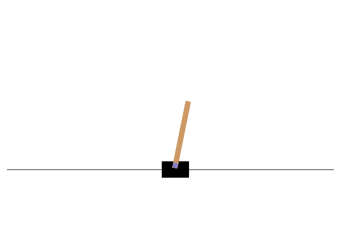

In [35]:
watch_agent()

Reward: 51.0


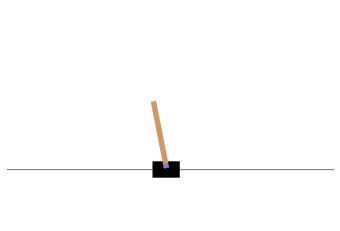

In [36]:
watch_agent()

Train the Agent with Hill Climbing 

In [37]:
env = gym.make('CartPole-v0')
env.seed(0)
np.random.seed(0)


def hill_climbing(n_episodes=50000, gamma=0.9, noise=1e-2):
    
    scores_deque = deque(maxlen=100)
    scores = []
    Gbest = -np.Inf
    θbest = policy.θ
    for i_episode in range(1, n_episodes+1):
        rewards = []
        state = env.reset()
        while True:
            action = policy.act(state)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        discounts = [gamma**i for i in range(len(rewards)+1)]
        G = sum([a*b for a,b in zip(discounts, rewards)])

        if G >= Gbest: 
            Gbest = G
            θbest = policy.θ
        
        
        policy.θ = θbest + noise * np.random.rand(*policy.θ.shape)

        if i_episode % 10 == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))

        
        if np.mean(scores_deque)>=env.spec.reward_threshold:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            policy.θ = θbest
            break
        
    return scores
            
scores = hill_climbing(gamma=0.95)

Episode 10	Average Score: 69.20
Episode 20	Average Score: 99.75
Episode 30	Average Score: 125.10
Episode 40	Average Score: 136.65
Episode 50	Average Score: 146.62
Episode 60	Average Score: 150.27
Episode 70	Average Score: 155.09
Episode 80	Average Score: 160.70
Episode 90	Average Score: 162.22
Episode 100	Average Score: 164.64
Episode 110	Average Score: 177.09
Episode 120	Average Score: 172.41
Episode 130	Average Score: 174.83
Episode 140	Average Score: 177.70
Episode 150	Average Score: 179.05
Episode 160	Average Score: 182.20
Episode 170	Average Score: 183.80
Episode 180	Average Score: 182.65
Episode 190	Average Score: 185.21
Episode 200	Average Score: 185.99
Episode 210	Average Score: 186.62
Environment solved in 216 episodes!	Average Score: 195.59


Plot the scores during training



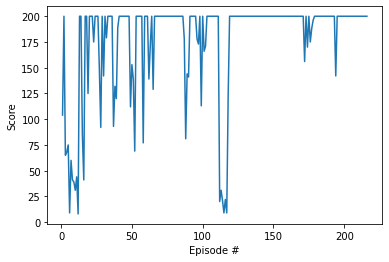

In [38]:
fig = plt.figure()
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [39]:
print ("Policy weights θ after train:\n", policy.θ)

Policy weights θ after train:
 [[0.8084713  0.81630923]
 [0.81886572 0.84066647]
 [0.83559449 0.86616117]
 [0.78410222 0.86296585]]


Watch a trained Agent!

Reward: 200.0


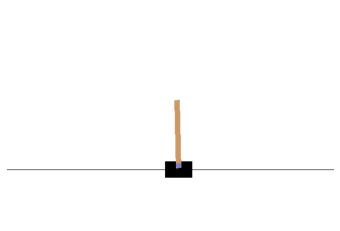

In [40]:
watch_agent()

Reward: 200.0


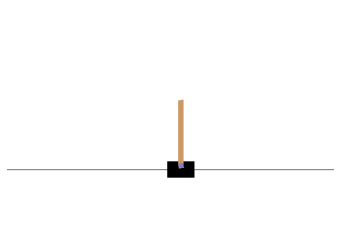

In [41]:
watch_agent()